Загрузка данных из двоичных файлов...
End
OM


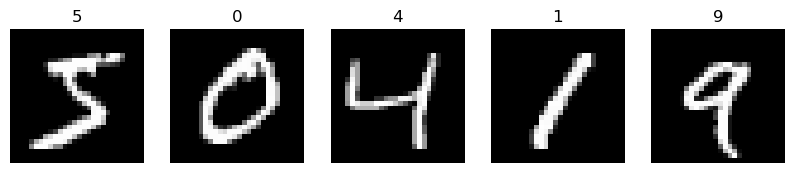

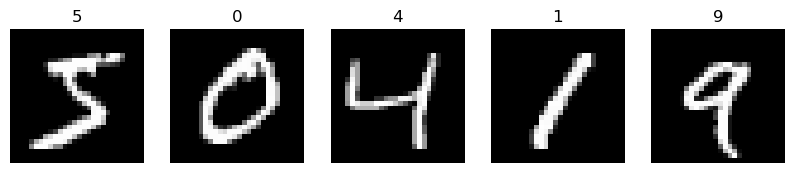

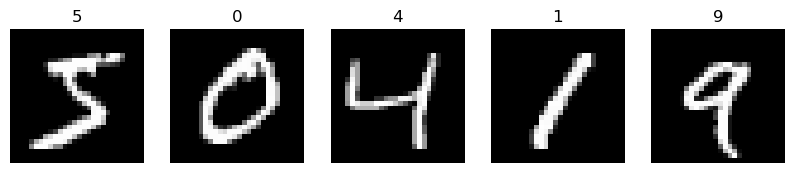

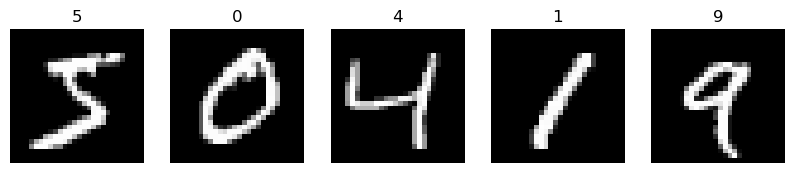

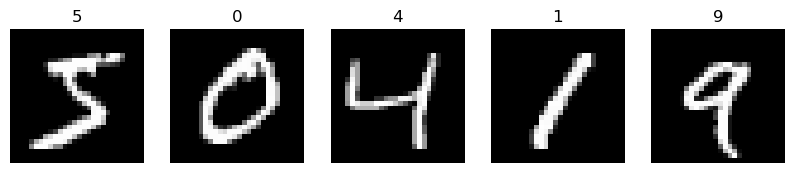

ПМ


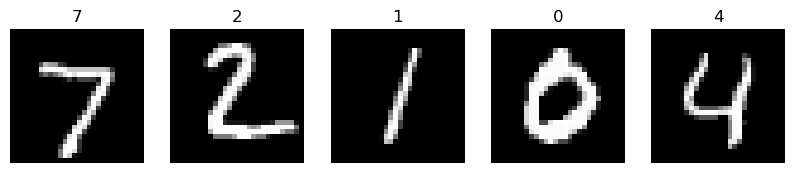

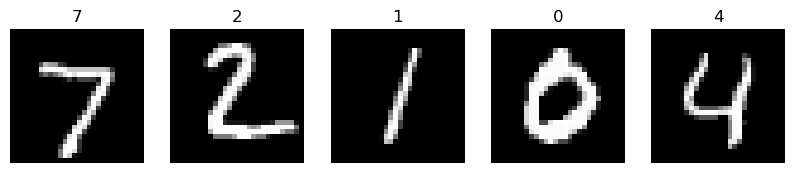

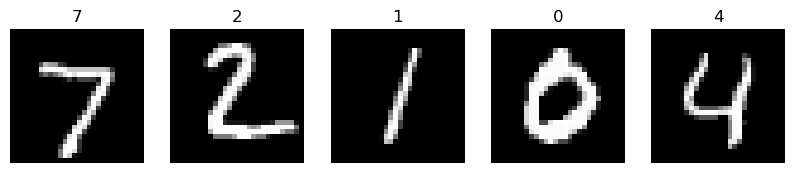

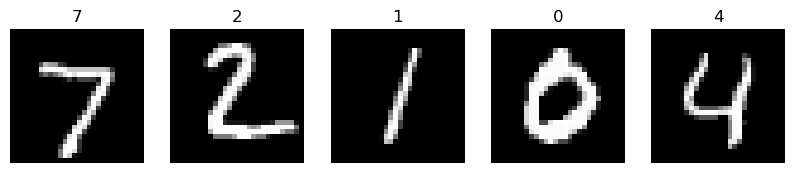

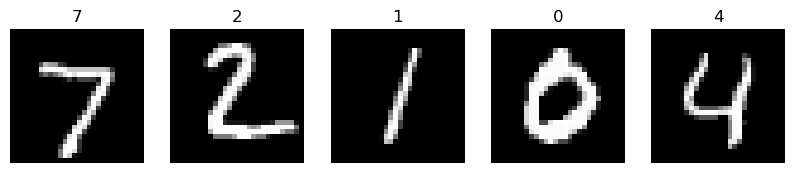

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import mode
# from mnist import MNIST

img_rows = img_cols = 28

path_to_data = r'C:\Users\gagag\Desktop\3 курс\Графика\ЛР8'
def load_data(path_to_data, img_rows, img_cols):
    print('Загрузка данных из двоичных файлов...')
    with open(path_to_data + '\images_trn.bin', 'rb') as rb:
        x_trn = np.fromfile(rb, dtype = np.uint8)
    with open(path_to_data + '\labels_trn.bin', 'rb') as rb:
        y_trn = np.fromfile(rb, dtype = np.uint8)
    with open(path_to_data + '\images_tst.bin', 'rb') as rb:
        x_tst = np.fromfile(rb, dtype = np.uint8)
    with open(path_to_data + '\labels_tst.bin', 'rb') as rb:
        y_tst = np.fromfile(rb, dtype = np.uint8)
    x_trn = x_trn.reshape(-1, img_rows * img_cols)
    x_tst = x_tst.reshape(-1, img_rows * img_cols)
    return x_trn, y_trn, x_tst, y_tst
# Загрузка обучающего и проверочного множества из бинарных файлов
# Загружаются изображения и их метки
x_trn, y_trn, x_tst, y_tst = load_data(path_to_data, img_rows, img_cols)
print("End")

def plot_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 2))  # Размер фигуры увеличен для более удобного отображения
    for i in range(1, num_images+1):
        plt.subplot(1,5,i)
        plt.imshow(images[i-1].reshape(img_rows, img_cols), cmap='gray')
        plt.title(labels[i-1])
        plt.axis('off')  
    plt.show()

# Вывод первых 5 изображений из обучающего набора
print("OM")
for i in range (5):
    plot_images(x_trn, y_trn)
print("ПМ")    
# Вывод первых 5 изображений из обучающего набора
for i in range (5):
    plot_images(x_tst, y_tst)


In [13]:

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

linear_regressor.fit(x_trn, y_trn)


# In[16]:


from sklearn.metrics import classification_report
y_true = y_tst
y_pred = linear_regressor.predict(x_tst).astype('int32')

unique_classes = np.unique(y_tst)

print(y_pred)
target_names = [f'class {i}' for i in unique_classes]

# target_names[0] = 'Кластер 0 -- ' + target_names[0]

print(classification_report(y_tst, y_pred, target_names=target_names, labels=unique_classes))


[6 2 1 ... 7 5 5]
              precision    recall  f1-score   support

     class 0       0.75      0.38      0.50       980
     class 1       0.47      0.47      0.47      1135
     class 2       0.22      0.27      0.24      1032
     class 3       0.23      0.31      0.27      1010
     class 4       0.20      0.31      0.24       982
     class 5       0.16      0.26      0.20       892
     class 6       0.16      0.21      0.18       958
     class 7       0.25      0.22      0.23      1028
     class 8       0.14      0.06      0.09       974
     class 9       0.45      0.05      0.09      1009

   micro avg       0.26      0.26      0.26     10000
   macro avg       0.30      0.25      0.25     10000
weighted avg       0.31      0.26      0.26     10000



C:\Users\gagag\AppData\Local\Temp\ipykernel_73440\3090402922.py:12: RuntimeWarning: invalid value encountered in cast
  y_pred = linear_regressor.predict(x_tst).astype('int32')


In [ ]:

# # Визуализация центроидов
# def plot_centroids(centroids, labels):
#     plt.figure(figsize=(10, 2))
#     plt.imshow(centroids.reshape(img_rows, img_cols), cmap='gray')
#     plt.title(labels)
#     plt.axis('off')
#     plt.show()
    
# for i in range(centroids.shape[0]):
#     plot_centroids(centroids[i], label_map[i])


# In[67]:


from sklearn.metrics import classification_report
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x_trn_norm = x_trn / 255.0  # Приведение пиксельных значений в диапазон [0,1]

# Применим K-Means
k = 10  # Вы предполагаете, что у вас 10 кластеров (соответствуют 10 цифрам MNIST)
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
kmeans.fit(x_trn_norm)
y_pred = kmeans.predict(x_trn_norm)

# Получить метки кластеров и центроиды
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

cluster_labels = {}
for cluster in range(k):
    # Для каждой метки кластера находите цифру, которая чаще всего присваивается этому кластеру
    mask = (labels == cluster)
    most_common_label = mode(y_trn[mask]).mode
    cluster_labels[cluster] = most_common_label
    
# Выводим карту сопоставления кластеров к цифрам
print("Кластер -> Цифра")
for cluster, digit in cluster_labels.items(): 
    print(f"    {cluster}   ->   {digit}")
    
# Преобразуем предсказанные кластеры в метки
y_pred_labels = np.array([cluster_labels[cluster] for cluster in y_pred])
target_names = [f'Кластер {cluster} -> Класс {digit}' for cluster, digit in cluster_labels.items()]

print(classification_report(y_trn, y_pred_labels, target_names=target_names, zero_division = 0 ))




In [20]:

x_tst_norm = x_tst / 255.0

y_pred_tst = kmeans.predict(x_tst_norm)
# Получить метки кластеров и центроиды
labels = kmeans.labels_

centroids = kmeans.cluster_centers_

cluster_labels = {}
for cluster in range(k):
    # Для каждой метки кластера находите цифру, которая чаще всего присваивается этому кластеру
    mask = (labels == cluster)
    most_common_label = mode(y_trn[mask]).mode
    cluster_labels[cluster] = most_common_label
    
# Выводим карту сопоставления кластеров к цифрам
print("Кластер -> Цифра")
for cluster, digit in cluster_labels.items(): 
    print(f"    {cluster}   ->   {digit}")
    
# Преобразуем предсказанные кластеры в метки
y_pred_labels = np.array([cluster_labels[cluster] for cluster in y_pred_tst])
target_names = [f'Кластер {cluster} -> Класс {digit}' for cluster, digit in cluster_labels.items()]
print(classification_report(y_tst, y_pred_labels, target_names=target_names, zero_division = 0 ))


Кластер -> Цифра
    0   ->   2
    1   ->   7
    2   ->   8
    3   ->   1
    4   ->   0
    5   ->   0
    6   ->   6
    7   ->   9
    8   ->   3
    9   ->   4
                      precision    recall  f1-score   support

Кластер 0 -> Класс 2       0.83      0.89      0.86       980
Кластер 1 -> Класс 7       0.66      0.98      0.78      1135
Кластер 2 -> Класс 8       0.87      0.69      0.77      1032
Кластер 3 -> Класс 1       0.53      0.70      0.61      1010
Кластер 4 -> Класс 0       0.37      0.46      0.41       982
Кластер 5 -> Класс 0       0.00      0.00      0.00       892
Кластер 6 -> Класс 6       0.87      0.83      0.85       958
Кластер 7 -> Класс 9       0.91      0.68      0.78      1028
Кластер 8 -> Класс 3       0.55      0.59      0.57       974
Кластер 9 -> Класс 4       0.40      0.45      0.43      1009

            accuracy                           0.64     10000
           macro avg       0.60      0.63      0.61     10000
        weighted avg     